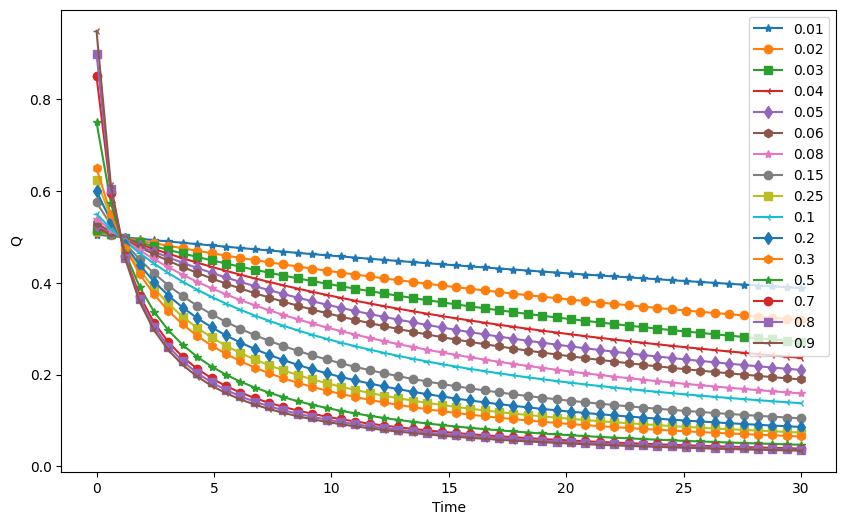

In [213]:
import numpy as np
import matplotlib.pyplot as plt

t=np.linspace(0,30,num=50)
b=[0.01,0.02,0.03,0.04,0.05,0.06,0.08,0.15,0.25,0.1,0.2,0.3,0.5,0.7,0.8,0.9]
h=40
marker=['*','o','s','3','d','h']

plt.figure(figsize=(10,6))
i=0
for beta in b:
    
    q=(1/(2*(beta*t+1)))*(beta+np.tanh(((np.sqrt(beta**2+1)*np.log(beta*t+1))-\
                                        2*np.arctan(h*((-2+beta\
                                        ))/(np.sqrt(beta**2+4)*beta))\
                                        *np.sqrt(beta**2+4)/(2*beta))))
    plt.plot(t,q,marker=marker[i])
    i=(i+1)%6
    
plt.xlabel('Time')
plt.ylabel('Q')
plt.legend(b)


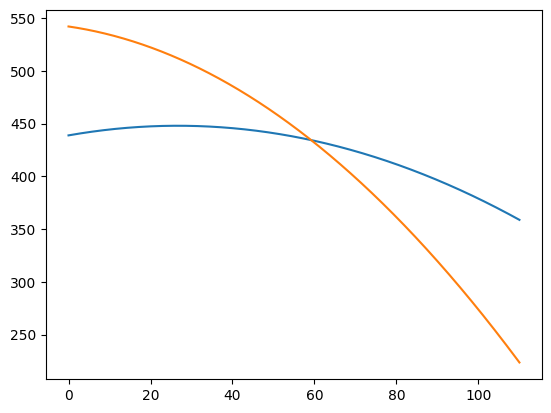

In [214]:
import pandas as pd
data=pd.read_csv('/home/ebny_walid/Downloads/plot-data.csv')
x=data['x']
y=data[' y']
from scipy.interpolate import interp1d
f=interp1d(x,y)

x_new=np.array(x[:3])
y_new=np.array(y[:3])

matrix=[[x[0]**2,x[0],1],
        [x[1]**2,x[2],1],
        [x[2]**2,x[2],1]]

matrix1=[
        [x[3]**2,x[3],1],
        [x[4]**2,x[4],1],
        [x[5]**2,x[5],1]
        ]

from scipy.linalg import solve

const=solve(matrix,y_new)

A=const[0]
B=const[1]
C=const[2]


t=np.linspace(0,110,num=1000)

q=A*t**2+B*t+C

y_new=np.array([y[3],y[4],y[5]])
const=solve(matrix1,y_new)

A=const[0]
B=const[1]
C=const[2]

q2=A*t**2+B*t+C


plt.plot(t,q)
plt.plot(t,q2)

/tmp/ipykernel_96242/2960268822.py:41: LinAlgWarning: Ill-conditioned matrix (rcond=4.52702e-30): result may not be accurate.
  s=solve(matrix,constant_vactor)


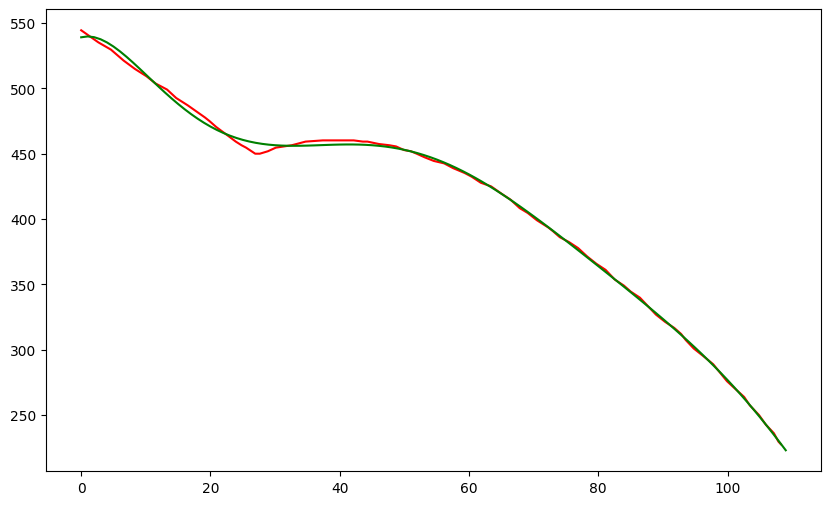

In [222]:
import pandas as pd 
from scipy.linalg import solve 
import matplotlib.pyplot as plt 
import numpy 

""" now creating a matrix of size (N+1)x(N+1) where n is the degree of the polynomial fitting curve """
#N=int(input("degree of the fitting: "))
N=7
matrix=np.zeros(shape=(N+1,N+1))

"""preloaded data """
data_file=pd.read_csv('/home/ebny_walid/Downloads/plot.csv')
data_file.head()
x=data_file["x"]
x=np.array(x)
y=np.array(data_file[" y"])

"""data is preloaded """
for i in range (N+1):
    for j in range(N+1):
        
        x1=[]
        if i==0 and j==0:
            matrix[i][j]=len(x)
        else: 
            for k in range (len(x)):
                x1.append((x[k])**(i+j))
                
            matrix[i][j]=sum(x1)
            

"""  matrix formation is done now.I have to code the constant vector   """

constant_vactor=[]
for i in range(N+1):
    if i==0:
        constant_vactor.append(sum(y))
    else:
        constant_vactor.append(sum(x**i*y))
s=[]
s=solve(matrix,constant_vactor)

def prediction(s,x,N):
    s=np.array(s)
    values=[]
    for i in range ( N+1):
        values.append(x**i)
    values=np.array(values)

    return sum(s*values)
    

x_predict=[]
y_predict=[]

for i in range (110):
    x_predict.append(i)
    y_predict.append(prediction(s,i,N))



plt.figure(figsize=(10,6))
plt.plot(x,y,color="r")
plt.plot(x_predict,y_predict,color="green")